In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image

# Load the pretrained VGG19 model
model = models.vgg19(pretrained=True).features
model.eval()

# Set the device to CPU or GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Load and preprocess the content and style images
content_image = Image.open("C:/Users/user/Desktop/Files/Painting/2.jpg")
style_image = Image.open("C:/Users/user/Desktop/Files/Painting/lana.jpg")

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

content_tensor = preprocess(content_image).unsqueeze(0).to(device)
style_tensor = preprocess(style_image).unsqueeze(0).to(device)

# Define the loss functions and weights
content_weight = 1  # Weight for content loss
style_weight = 10  # Weight for style loss

content_loss = nn.MSELoss()
style_loss = nn.MSELoss()

# Forward pass through the model to extract content and style features
content_features = model(content_tensor)
style_features = model(style_tensor)

# Initialize the generated image as a copy of the content image
generated_image = content_tensor.clone().requires_grad_(True)

# Define the optimizer
optimizer = optim.Adam([generated_image], lr=0.01)

# Number of optimization steps
num_steps = 200

# Perform style transfer optimization
for step in range(num_steps):
    optimizer.zero_grad()

    # Forward pass through the model with the generated image
    generated_features = model(generated_image)

    # Compute the content loss
    content_loss_value = content_loss(generated_features, content_features)

    # Compute the style loss
    style_loss_value = style_loss(generated_features, style_features)

    # Compute the total loss
    total_loss = content_weight * content_loss_value + style_weight * style_loss_value

    # Backpropagation and optimization
    total_loss.backward(retain_graph=True)  # Add retain_graph=True here

    optimizer.step()

    # Print the loss at every few steps
    if step % 10 == 0:
        print("Step [{}/{}], Total Loss: {:.4f}".format(step, num_steps, total_loss.item()))

# Convert the generated tensor to an image
generated_image = generated_image.detach().cpu().squeeze(0)
generated_image = transforms.ToPILImage()(generated_image)

# Save the generated image
generated_image.save("C:/Users/user/Desktop/1.jpg")


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Step [0/200], Total Loss: 21.3504
Step [10/200], Total Loss: 7.4712
Step [20/200], Total Loss: 6.7679
Step [30/200], Total Loss: 6.2540
Step [40/200], Total Loss: 5.9241
Step [50/200], Total Loss: 5.5906
Step [60/200], Total Loss: 5.3542
Step [70/200], Total Loss: 5.1442
Step [80/200], Total Loss: 4.9897
Step [90/200], Total Loss: 4.8664
Step [100/200], Total Loss: 4.7461
Step [110/200], Total Loss: 4.6328
Step [120/200], Total Loss: 4.5359
Step [130/200], Total Loss: 4.4537
Step [140/200], Total Loss: 4.3687
Step [150/200], Total Loss: 4.2674
Step [160/200], Total Loss: 4.1200
Step [170/200], Total Loss: 3.9494
Step [180/200], Total Loss: 3.8275
Step [190/200], Total Loss: 3.7242


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image

# Define the ResNet-based style transfer model
class StyleTransferModel(nn.Module):
    def __init__(self):
        super(StyleTransferModel, self).__init__()
        self.model = models.resnet50(pretrained=True)
        
    def forward(self, x):
        return self.model(x)

# Load and preprocess the content and style images
content_image = Image.open("C:/Users/user/Desktop/Files/Painting/Exquisite.jpg")
style_image = Image.open("C:/Users/user/Desktop/Files/Painting/pink tree.jpg")

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

content_tensor = preprocess(content_image).unsqueeze(0)
style_tensor = preprocess(style_image).unsqueeze(0)

# Define the loss functions and weights
content_loss = nn.MSELoss()
style_loss = nn.MSELoss()

# Initialize the generated image as a copy of the content image
generated_image = content_tensor.clone().requires_grad_(True)

# Set up the style transfer model
model = StyleTransferModel()

# Define the optimizer
optimizer = optim.Adam([generated_image], lr=0.01)

# Number of optimization steps
num_steps = 200

# Perform style transfer optimization
for step in range(num_steps):
    optimizer.zero_grad()

    # Forward pass through the model with the generated image
    content_features = model(content_tensor)
    style_features = model(style_tensor)
    generated_features = model(generated_image)

    # Compute the content loss
    content_loss_value = content_loss(generated_features, content_features)

    # Compute the style loss
    style_loss_value = style_loss(generated_features, style_features)

    # Compute the total loss
    total_loss = content_loss_value + style_loss_value

    # Backpropagation and optimization
    total_loss.backward(retain_graph=True)  # Add retain_graph=True here
    optimizer.step()

    # Print the loss at every few steps
    if step % 10 == 0:
        print("Step [{}/{}], Total Loss: {:.4f}".format(step, num_steps, total_loss.item()))

# Convert the generated tensor to an image
generated_image = generated_image.detach().squeeze(0).permute(1, 2, 0).numpy()
generated_image = Image.fromarray((generated_image * 255).astype('uint8'))

# Save the generated image
generated_image.save("C:/Users/user/Desktop/4.jpg")


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Step [0/200], Total Loss: 0.0107
Step [10/200], Total Loss: 0.0071
Step [20/200], Total Loss: 0.0059
Step [30/200], Total Loss: 0.0057
Step [40/200], Total Loss: 0.0056
Step [50/200], Total Loss: 0.0055
Step [60/200], Total Loss: 0.0055
Step [70/200], Total Loss: 0.0055
Step [80/200], Total Loss: 0.0055
Step [90/200], Total Loss: 0.0055
Step [100/200], Total Loss: 0.0055
Step [110/200], Total Loss: 0.0054
Step [120/200], Total Loss: 0.0055
Step [130/200], Total Loss: 0.0055
Step [140/200], Total Loss: 0.0054
Step [150/200], Total Loss: 0.0054
Step [160/200], Total Loss: 0.0055
Step [170/200], Total Loss: 0.0054
Step [180/200], Total Loss: 0.0054
Step [190/200], Total Loss: 0.0054


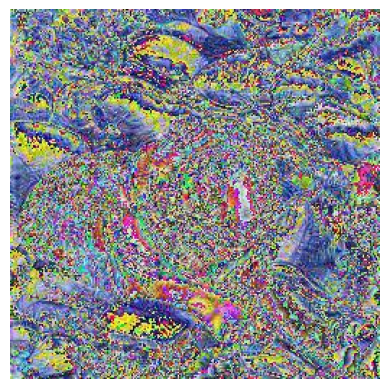

In [3]:
import matplotlib.pyplot as plt

# Load the generated image
generated_image = Image.open("C:/Users/user/Desktop/1.jpg")

# Display the image
plt.imshow(generated_image)
plt.axis('off')
plt.show()
